In [101]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import tkinter as tk
from tkinter import scrolledtext
from tkinter import ttk

In [102]:
df = pd.read_csv("D:\\IEV3.2\\ADV\\house.csv")

In [103]:
#head
df.head()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.184098,1286.68,204.003817,22,67,96004.804557
1,1,34.866901,1855.25,186.980360,8,30,92473.722568
2,1,36.980709,692.09,111.224999,24,24,98112.519942
3,1,17.445723,1399.49,237.998760,1,66,92118.326874
4,1,52.587646,84.65,100.996400,20,3,98976.653176


In [104]:
#tail
df.tail()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
4303,9,175.166533,1299.71,217.739012,2,5,102707.356224
4304,6,215.352151,1346.36,77.724676,14,5,99695.064992
4305,5,299.563972,1585.37,235.537881,3,5,93803.715617
4306,1,29.193907,1896.23,147.223827,4,2,92914.729126
4307,2,54.437573,255.24,25.524020,18,0,93743.047292


In [105]:
#shape
df.shape

(4308, 7)

In [106]:
df.dtypes

bedroom_count        int64
net_sqm            float64
center_distance    float64
metro_distance     float64
floor                int64
age                  int64
price              float64
dtype: object

In [107]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom_count    4308 non-null   int64  
 1   net_sqm          4308 non-null   float64
 2   center_distance  4308 non-null   float64
 3   metro_distance   4308 non-null   float64
 4   floor            4308 non-null   int64  
 5   age              4308 non-null   int64  
 6   price            4308 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 235.7 KB


In [108]:
#finding missing value
df.isnull().sum()

bedroom_count      0
net_sqm            0
center_distance    0
metro_distance     0
floor              0
age                0
price              0
dtype: int64

In [109]:
#finding duplicates
df.duplicated().sum()

0

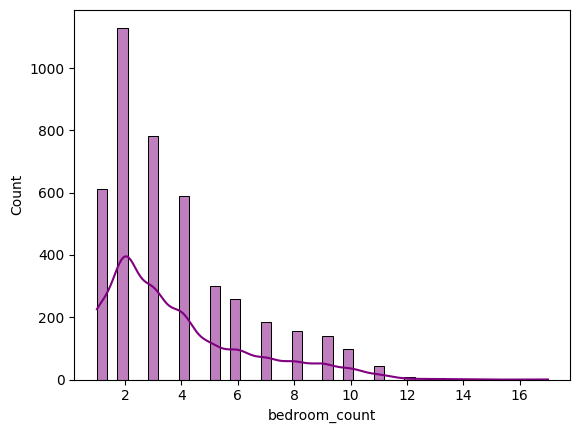

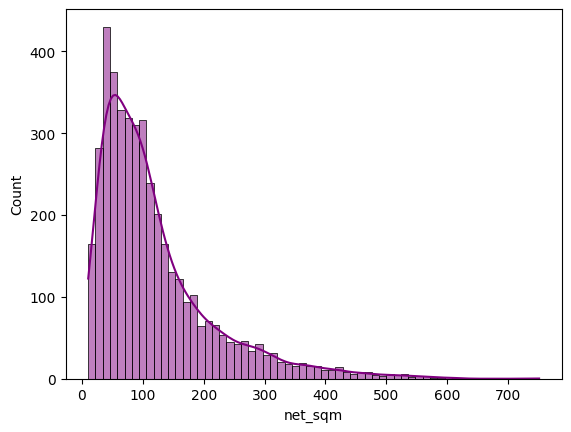

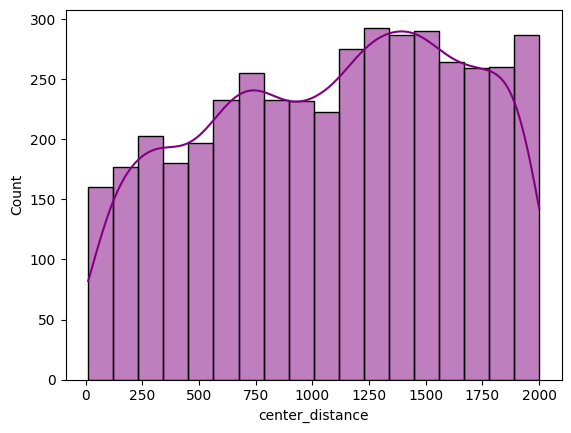

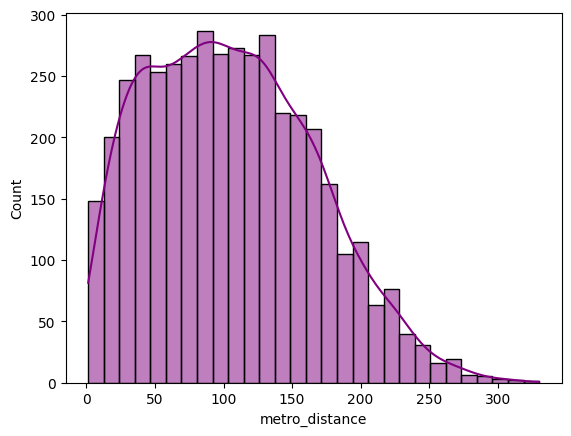

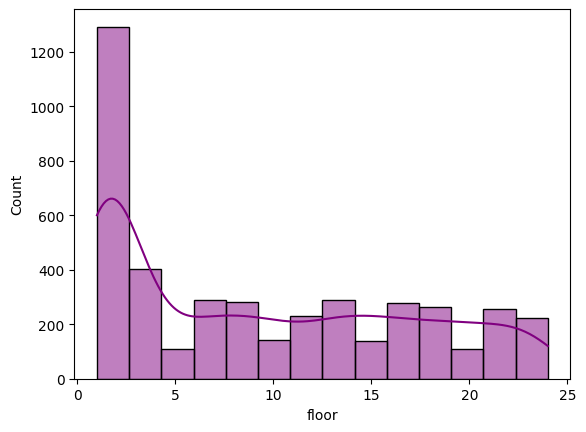

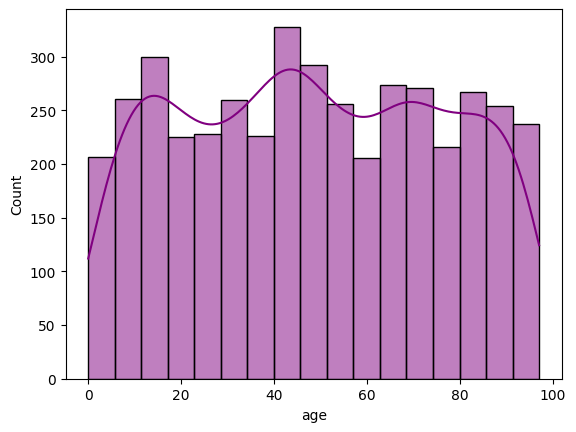

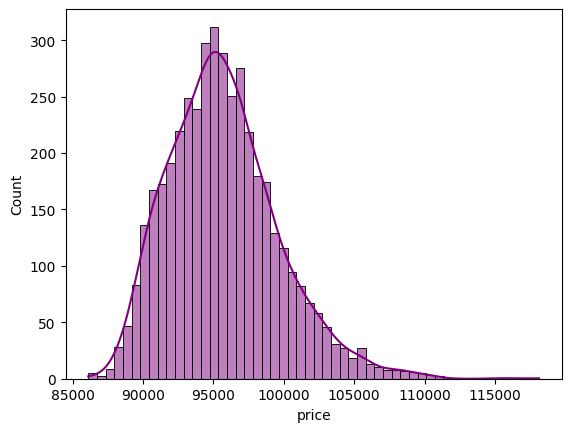

In [110]:
#histogram to understand the distribution
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i,kde=True,color='purple')
    plt.show()

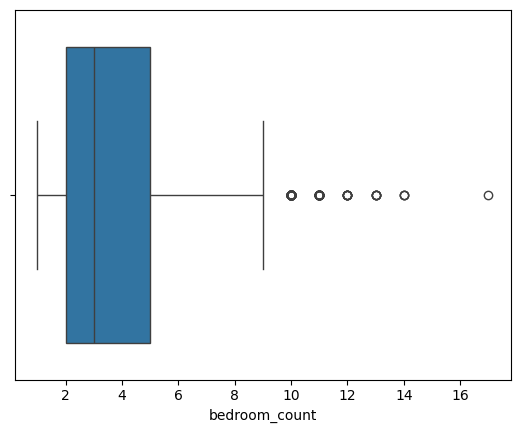

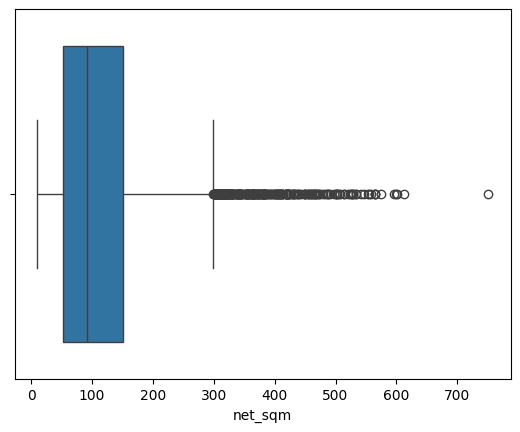

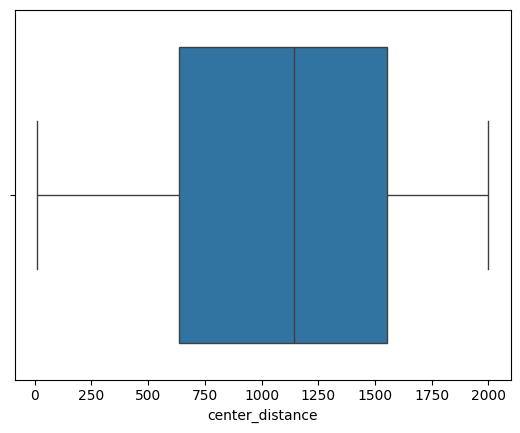

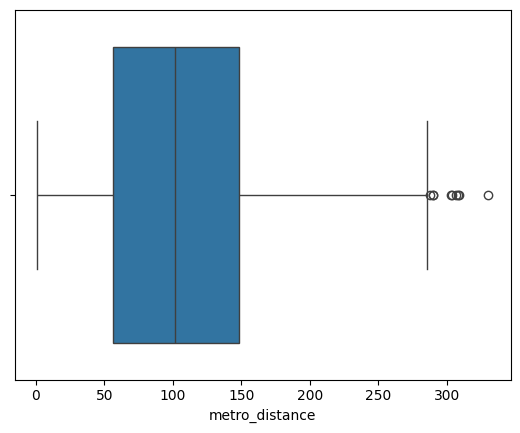

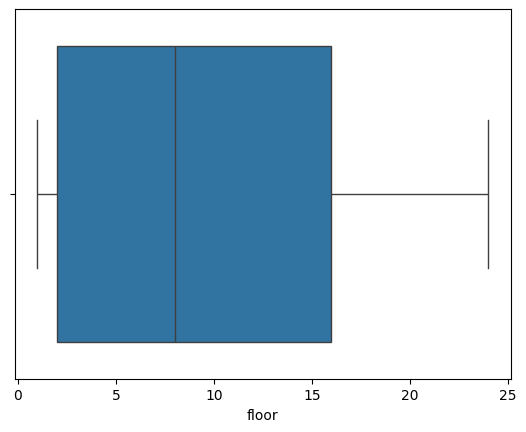

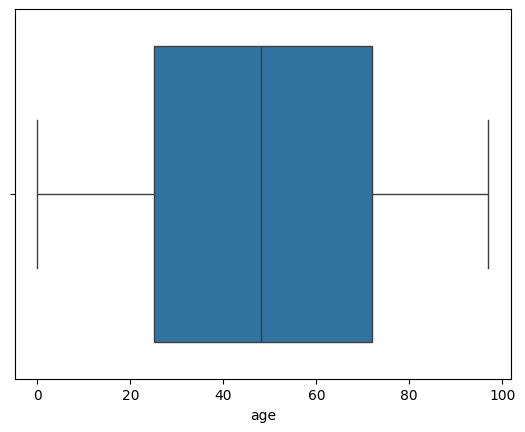

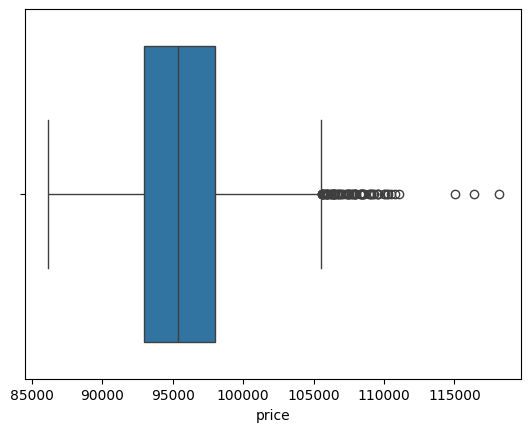

In [111]:
#Boxplot to identify outliers
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

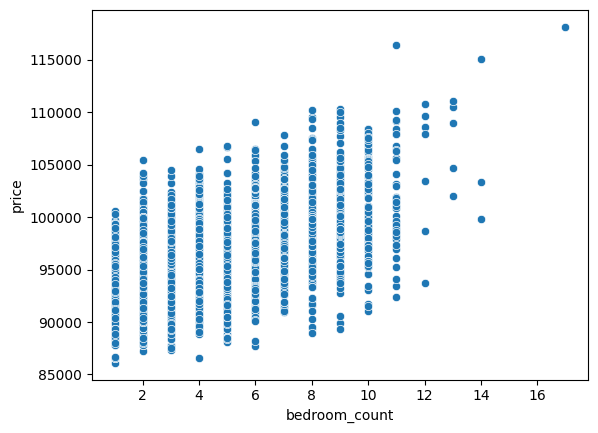

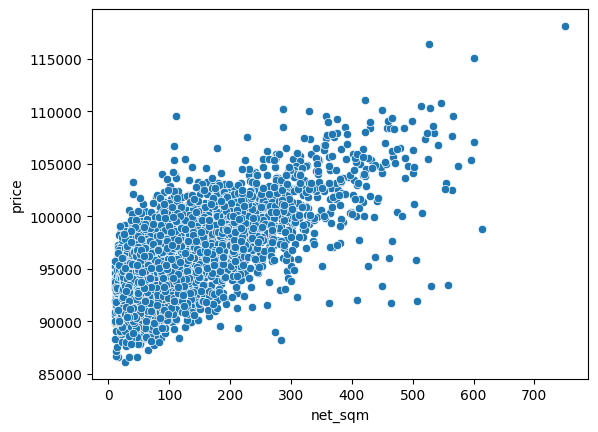

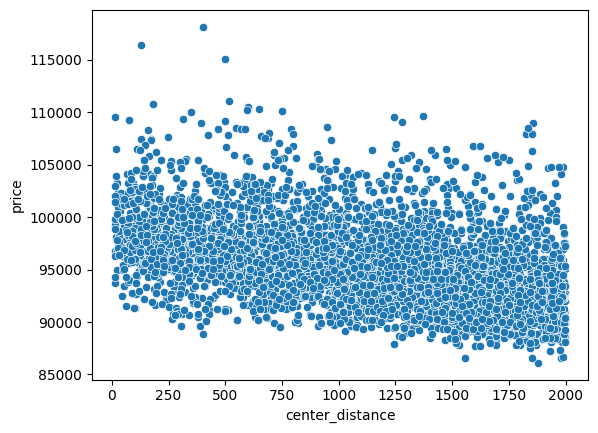

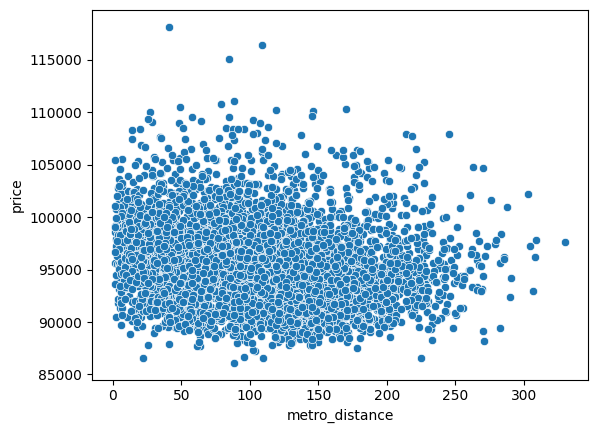

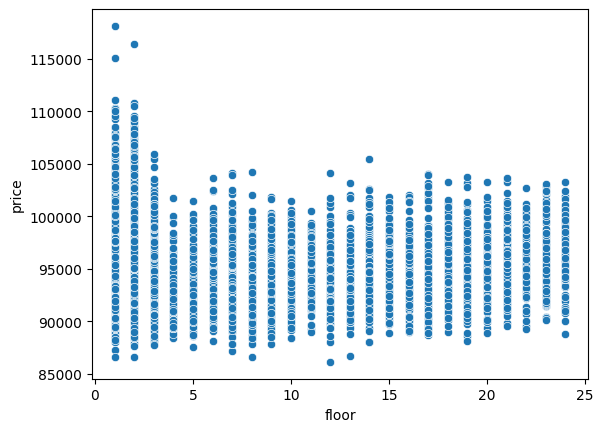

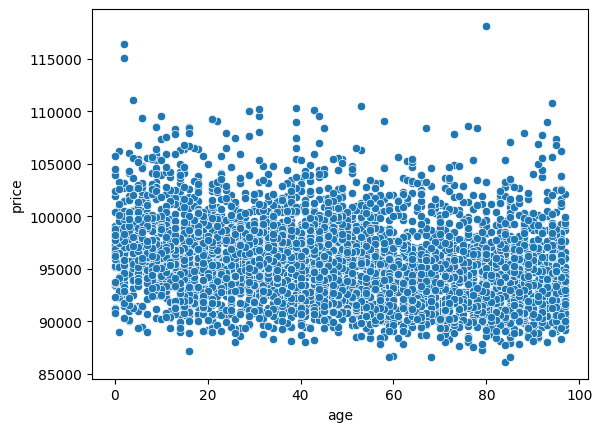

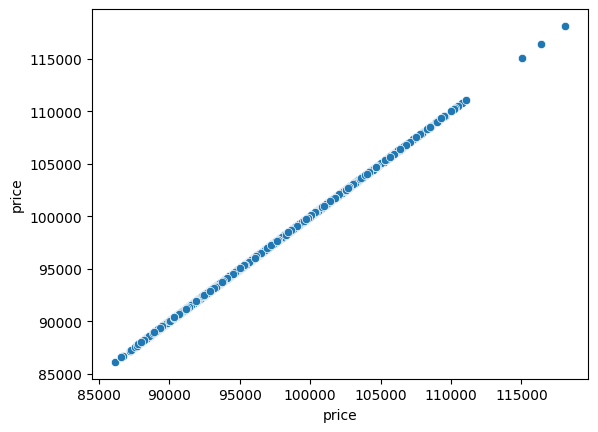

In [112]:
#scatter plot to understand the relationship
for i in df.select_dtypes(include="number").columns:
    sns.scatterplot(data=df,x=i,y='price')
    plt.show()

In [113]:
#correlation with heatmap to interpret the relation
c = df.corr()

<Axes: >

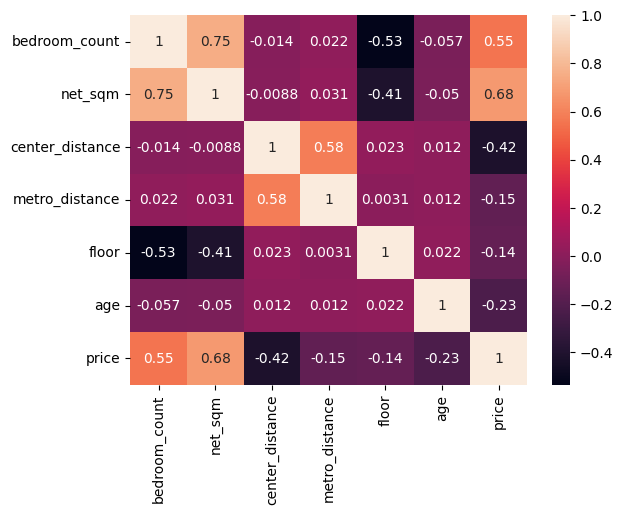

In [114]:
sns.heatmap(c,annot=True)

In [115]:
pd.DataFrame(df.corr().price)

,price
bedroom_count,0.552405
net_sqm,0.681987
center_distance,-0.418161
metro_distance,-0.146373
floor,-0.136713
age,-0.225119
price,1.000000


In [116]:
#decide whether to do outliers tratment or not 
def wisker(col):
    q1,q3 = np.percentile(col , [25,75])
    iqr = q3 - q1
    lw = q1 - 1.5*iqr
    uw = q3 + 1.5*iqr
    return lw,uw

In [117]:
df.columns

Index(['bedroom_count', 'net_sqm', 'center_distance', 'metro_distance',
       'floor', 'age', 'price'],
      dtype='object')

In [118]:
for i in df.columns:
    lw,uw = wisker(df[i])
    df[i] = np.where(df[i] < lw , lw , df[i])
    df[i] = np.where(df[i] > uw , uw , df[i])

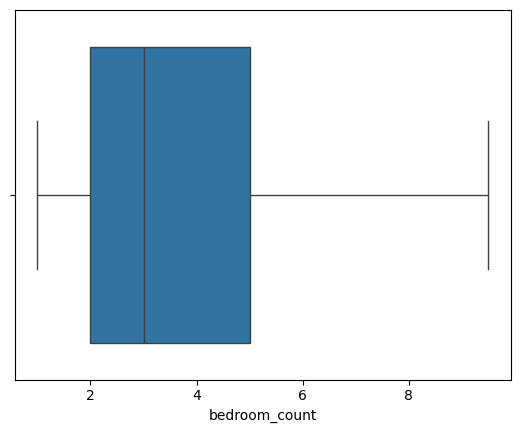

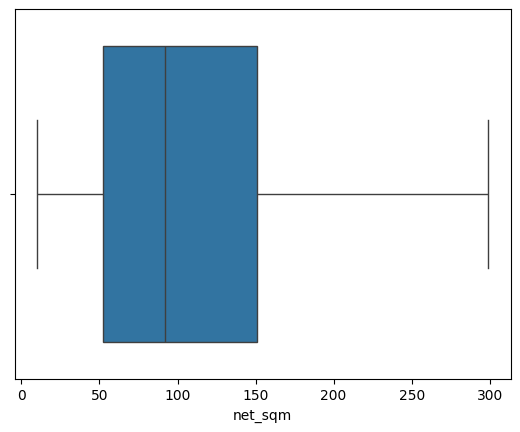

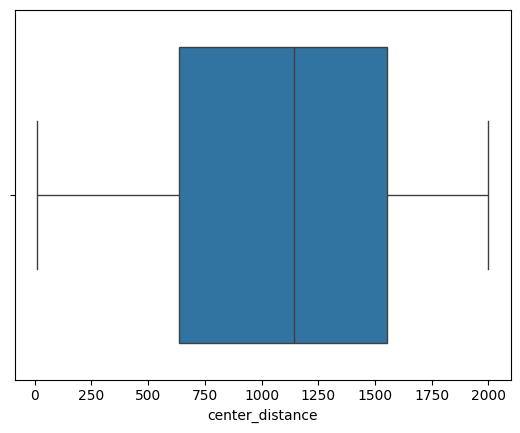

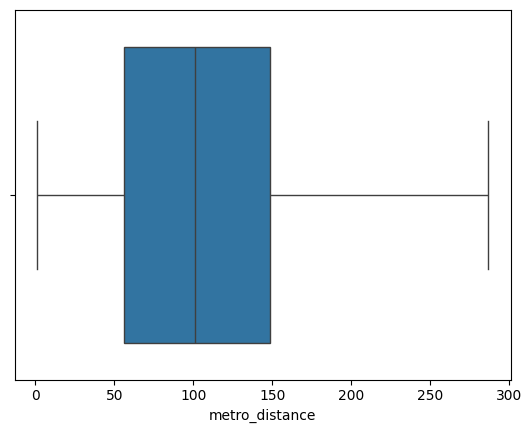

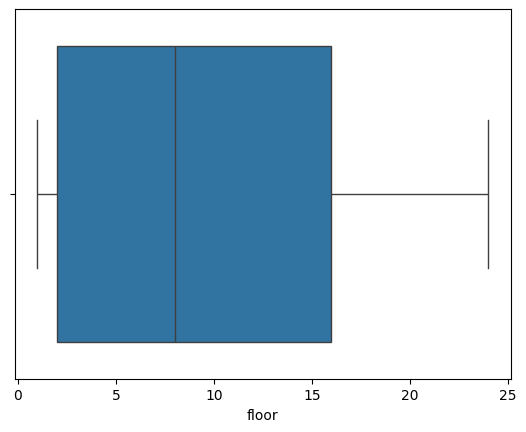

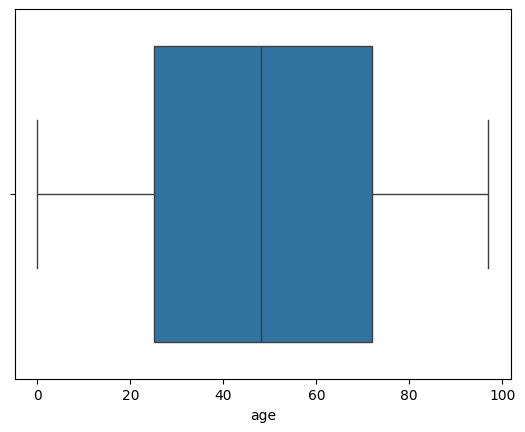

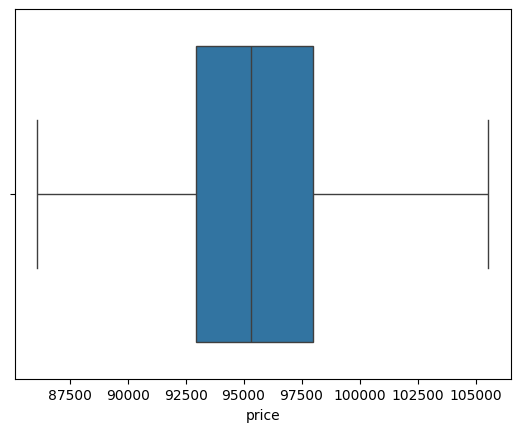

In [119]:
#Boxplot to check outliers after tratment
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
import tkinter as tk
from tkinter import messagebox

In [121]:
X = df.drop(['price'],axis = 1)
y = df['price']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.180,random_state=80)

In [123]:
cols = X_train.columns

In [124]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [125]:
# regressor = SVR(kernel='rbf', C=1500.0, epsilon=0.2, gamma='scale')
# regressor.fit(X_train,y_train)

In [126]:
# from sklearn.model_selection import GridSearchCV

# # Define the grid of hyperparameters
# param_grid = {
#     'C': [1500 ,1600, 1900],
#     'epsilon': [1.0, 0.1, 0.5],
#     'gamma': ['scale', 'auto', 0.1]
# }

# # Initialize SVR
# svr = SVR(kernel='rbf')

# # Grid search with cross-validation
# grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # Best hyperparameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Fit SVR with best hyperparameters
# best_svr = SVR(kernel='rbf', **best_params)
# best_svr.fit(X_train, y_train)


In [127]:
# y_pred = best_svr.predict(X_test)

In [128]:
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# print("train score",best_svr.score(X_train,y_train))
# print("test score",best_svr.score(X_test,y_test))
# print("Mean Absolute Error:", mae)
# print("Mean Squared Error:", mse)
# print("R-squared Score:", r2)

In [129]:

# plt.scatter(y_test, y_pred)
# plt.xlabel("Actual Values")
# plt.ylabel("Predicted Values")
# plt.title("Actual vs. Predicted Values")
# plt.show()

In [1]:
# Train SVR model
regressor = SVR(kernel='rbf', C=2000.0)
regressor.fit(X_train, y_train)

# Calculate R-squared score on test set
y_pred = regressor.predict(X_test)
accuracy = r2_score(y_test, y_pred)

# Create GUI
def predict_price():
    try:
        # Get user input
        bedroom_count = float(entry_bedroom.get())
        net_sqm = float(entry_sqm.get())
        center_distance = float(entry_center.get())
        metro_distance = float(entry_metro.get())
        floor = float(entry_floor.get())
        age = float(entry_age.get())
        
        # Scale user input
        user_input_scaled = sc.transform([[bedroom_count, net_sqm, center_distance, metro_distance, floor, age]])
        
        # Predict price
        predicted_price = regressor.predict(user_input_scaled)
        
        # Show predicted price
        messagebox.showinfo("Predicted Price", f"The predicted price of the house is: {predicted_price[0]}")
    except ValueError:
        messagebox.showerror("Error", "Please enter valid numeric values")

# Create main window
root = tk.Tk()
root.title("House Price Prediction")

# Create input fields
tk.Label(root, text="Number of Bedrooms:").grid(row=0, column=0)
entry_bedroom = tk.Entry(root)
entry_bedroom.grid(row=0, column=1)

tk.Label(root, text="Net Square Meters:").grid(row=1, column=0)
entry_sqm = tk.Entry(root)
entry_sqm.grid(row=1, column=1)

tk.Label(root, text="Distance to City Center (km):").grid(row=2, column=0)
entry_center = tk.Entry(root)
entry_center.grid(row=2, column=1)

tk.Label(root, text="Distance to Metro (km):").grid(row=3, column=0)
entry_metro = tk.Entry(root)
entry_metro.grid(row=3, column=1)

tk.Label(root, text="Floor:").grid(row=4, column=0)
entry_floor = tk.Entry(root)
entry_floor.grid(row=4, column=1)

tk.Label(root, text="Age of the House:").grid(row=5, column=0)
entry_age = tk.Entry(root)
entry_age.grid(row=5, column=1)

# Create predict button
predict_button = tk.Button(root, text="Predict Price", command=predict_price)
predict_button.grid(row=6, columnspan=2)

# Create label to display accuracy
accuracy_label = tk.Label(root, text=f"Model Accuracy (R-squared): {accuracy:.2f}")
accuracy_label.grid(row=7, columnspan=2)

# Run GUI

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()
root.mainloop()

NameError: name 'SVR' is not defined